In [1]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd


In [ ]:
# Define the stock ticker and time period
ticker = "AAPL"
start_date = "2018-01-01"
end_date = "2023-12-31"

# Download historical stock data
apple = yf.download(ticker, start=start_date, end=end_date)

# Preview the first 5 rows
apple.head()


/tmp/ipython-input-1103965342.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341892,40.351262,39.639317,39.850091,102223600
2018-01-03,40.334858,40.878185,40.271629,40.405116,118071600
2018-01-04,40.522213,40.625258,40.299731,40.407458,89738400
2018-01-05,40.983562,41.070212,40.526889,40.618224,94640000
2018-01-08,40.831348,41.126429,40.732985,40.831348,82271200


In [ ]:
# Check for missing values
apple.isnull().sum()


,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [ ]:
# Reset the index so 'Date' becomes a column
apple.reset_index(inplace=True)

# Check data types
apple.dtypes


,,0
Price,Ticker,
Date,,datetime64[ns]
Close,AAPL,float64
High,AAPL,float64
Low,AAPL,float64
Open,AAPL,float64
Volume,AAPL,int64


In [ ]:
# Daily Return using Close price
apple['Daily Return'] = apple['Close'].pct_change()

# Cumulative Return
apple['Cumulative Return'] = (1 + apple['Daily Return']).cumprod() - 1

# Rolling Moving Averages (20-day and 50-day)
apple['MA20'] = apple['Close'].rolling(window=20).mean()
apple['MA50'] = apple['Close'].rolling(window=50).mean()
# Rolling Volatility (20-day std of daily returns)
apple['Volatility20'] = apple['Daily Return'].rolling(window=20).std()

# Preview new columns
apple.head(25)

Price,Date,Close,High,Low,Open,Volume,Daily Return,Cumulative Return,MA20,MA50,Volatility20
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
0,2018-01-02,40.341892,40.351262,39.639317,39.850091,102223600,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,40.334858,40.878185,40.271629,40.405116,118071600,-0.000174,-0.000174,NaN,NaN,NaN
2,2018-01-04,40.522213,40.625258,40.299731,40.407458,89738400,0.004645,0.004470,NaN,NaN,NaN
3,2018-01-05,40.983562,41.070212,40.526889,40.618224,94640000,0.011385,0.015906,NaN,NaN,NaN
4,2018-01-08,40.831348,41.126429,40.732985,40.831348,82271200,-0.003714,0.012133,NaN,NaN,NaN
5,2018-01-09,40.826664,40.997623,40.611208,40.878186,86336000,-0.000115,0.012017,NaN,NaN,NaN
6,2018-01-10,40.817299,40.819643,40.515193,40.552665,95839600,-0.000229,0.011784,NaN,NaN,NaN
7,2018-01-11,41.049152,41.098334,40.864142,40.887559,74670800,0.005680,0.017532,NaN,NaN,NaN
8,2018-01-12,41.473034,41.536267,41.135797,41.259918,101672400,0.010326,0.028039,NaN,NaN,NaN


In [ ]:
# Save cleaned data to CSV
apple.to_csv("apple_clean.csv", index=False)


***EDA***

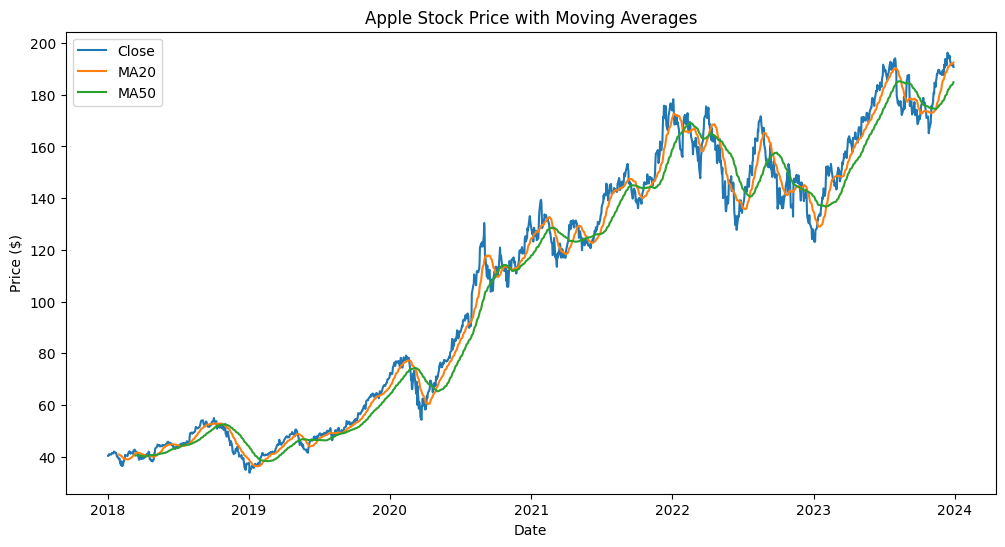

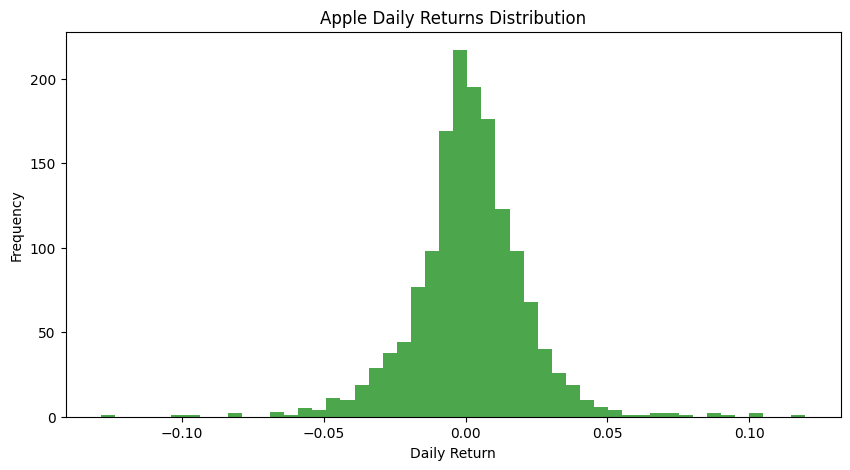

In [ ]:
import matplotlib.pyplot as plt

# Closing Price over time
plt.figure(figsize=(12,6))
plt.plot(apple['Date'], apple['Close'], label='Close')
plt.plot(apple['Date'], apple['MA20'], label='MA20')
plt.plot(apple['Date'], apple['MA50'], label='MA50')
plt.title('Apple Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Daily Returns histogram
plt.figure(figsize=(10,5))
plt.hist(apple['Daily Return'].dropna(), bins=50, color='green', alpha=0.7)
plt.title('Apple Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


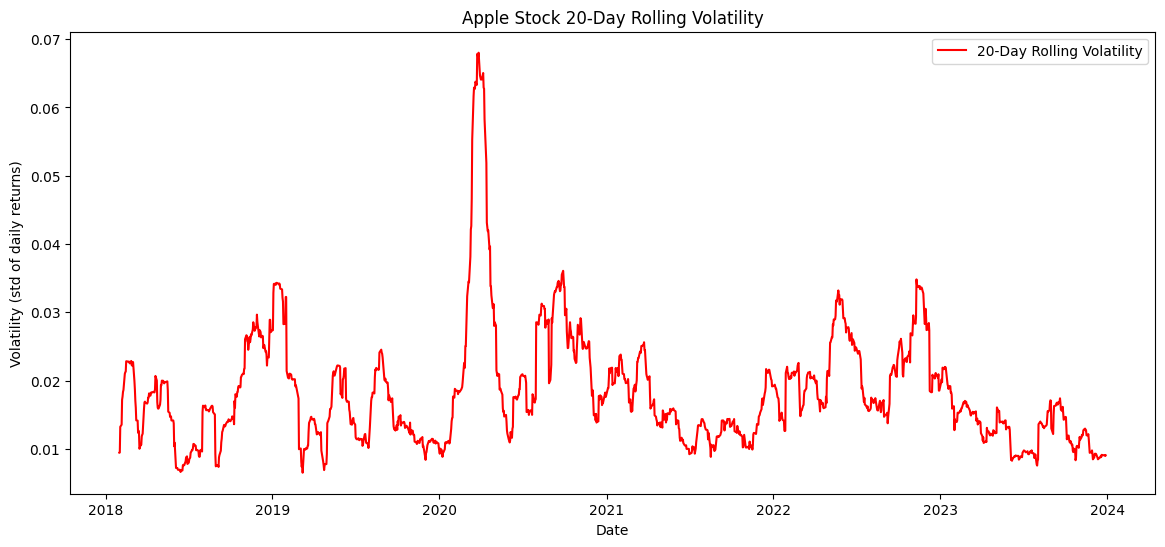

In [ ]:
# Plot Rolling Volatility
plt.figure(figsize=(14,6))
plt.plot(apple['Date'], apple['Volatility20'], label='20-Day Rolling Volatility', color='red')
plt.title('Apple Stock 20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (std of daily returns)')
plt.legend()
plt.show()


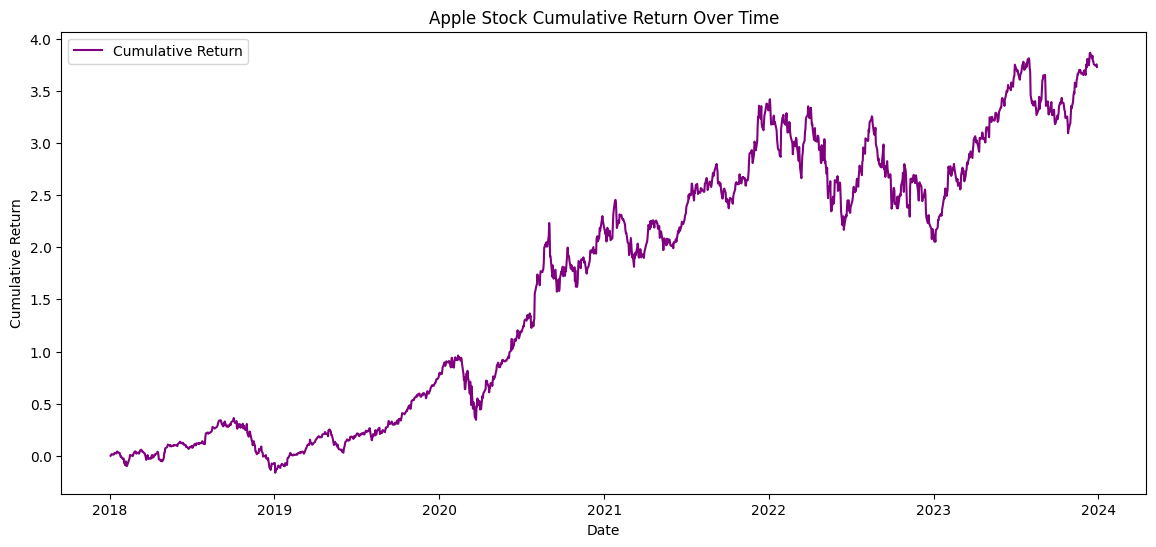

In [ ]:
# Plot Cumulative Return
plt.figure(figsize=(14,6))
plt.plot(apple['Date'], apple['Cumulative Return'], label='Cumulative Return', color='purple')
plt.title('Apple Stock Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [ ]:
# Total Return = (last closing price / first closing price) - 1
total_return = (apple['Close'].iloc[-1] / apple['Close'].iloc[0]) - 1
print(f"Total Return: {total_return.item():.2%}")

Total Return: 372.78%


In [ ]:
# Average Daily Return
avg_daily_return = apple['Daily Return'].mean()
print(f"Average Daily Return: {avg_daily_return:.4%}")


Average Daily Return: 0.1230%


In [ ]:
# Volatility = standard deviation of daily returns
volatility = apple['Daily Return'].std()
print(f"Volatility (Daily Std Dev): {volatility:.4%}")


Volatility (Daily Std Dev): 1.9955%


In [ ]:
# Max Drawdown = largest peak-to-trough decline
cumulative = (1 + apple['Daily Return']).cumprod()
rolling_max = cumulative.cummax()
drawdown = (cumulative - rolling_max) / rolling_max
max_drawdown = drawdown.min()
print(f"Max Drawdown: {max_drawdown:.2%}")


Max Drawdown: -38.52%


In [ ]:
# Assume risk-free rate ~0 for simplicity
sharpe_ratio = avg_daily_return / volatility * (252 ** 0.5)  # 252 trading days in a year
print(f"Annualized Sharpe Ratio: {sharpe_ratio:.2f}")


Annualized Sharpe Ratio: 0.98


In [ ]:
kpi_table = pd.DataFrame({
    'Metric': ['Total Return', 'Average Daily Return', 'Volatility', 'Max Drawdown', 'Sharpe Ratio'],
    'Value': [total_return.item(), avg_daily_return, volatility, max_drawdown, sharpe_ratio]
})

# Format as percentage for readability
kpi_table['Value'] = kpi_table['Value'].apply(lambda x: f"{x:.2%}" if isinstance(x, float) else x)
kpi_table

,Metric,Value
0,Total Return,372.78%
1,Average Daily Return,0.12%
2,Volatility,2.00%
3,Max Drawdown,-38.52%
4,Sharpe Ratio,97.83%
